# Analyze the crash rate 

### Load evaluation results

In [2]:
import numpy as np
import os

# please define the path to the data folder
root_folder = "/path/to/root/folder"

# please define the experiment name
experiment_folder = "Experiment-test_basemodel_2024-01-17"

# load test results
files = sorted(os.listdir(os.path.join(root_folder,experiment_folder)))
print(len(files))
weighted_result_list = []
all_index = set(list(range(1000)))
for file in files:
    try:
        if file.endswith("npy"):
            file_index = file.replace("weight","")
            file_index = file_index.replace(".npy","")
            file_index = int(file_index)
            if file_index not in all_index:
                continue
            all_index -= {file_index}
            
            weight_list_tmp = list(np.load(os.path.join(root_folder, experiment_folder, file)).flatten())
            weighted_result_list.extend(weight_list_tmp)
    except:
        continue
result_path = os.path.join(root_folder, experiment_folder, "result_fig")
result_data_path = os.path.join(result_path, "weight.npy")
os.makedirs(result_path, exist_ok=True)
np.save(result_data_path, weighted_result_list)
print("test number:", len(weighted_result_list))
print("crash number:", np.sum(np.array(weighted_result_list)>0))
print("NADE crash rate:", np.sum(np.array(weighted_result_list)>0)/len(weighted_result_list))
print("NDE crash rate:", np.sum(weighted_result_list)/len(weighted_result_list))

507
test number: 1795898
crash number: 1141
NADE crash rate: 0.0006353367507508778
NDE crash rate: 6.251600825539144e-05


### Plot distribution of crash weight

Text(0, 0.5, 'Contribution to NDE Crash Rate')

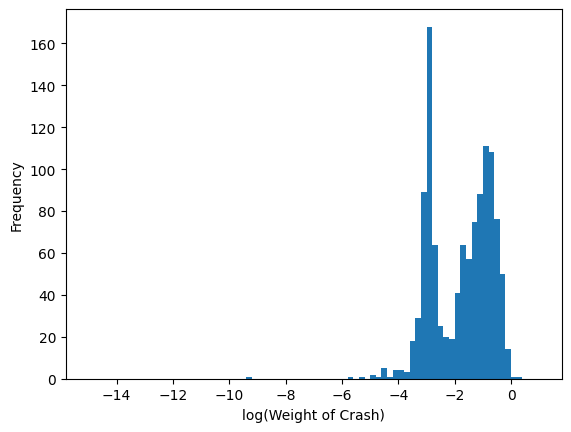

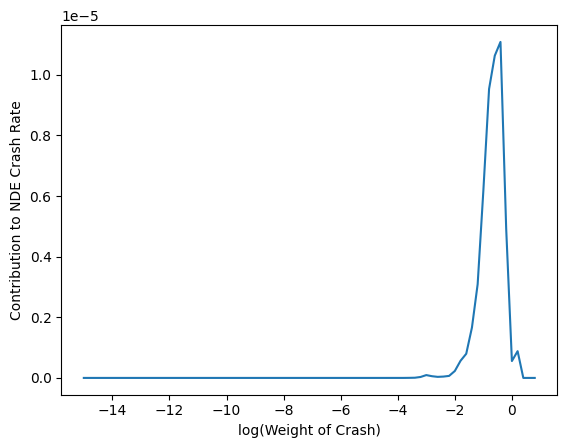

In [3]:
import matplotlib.pyplot as plt
np_weighted_result_list = np.array(weighted_result_list)
n, bins, _ = plt.hist(np.log10(np_weighted_result_list[np.nonzero(weighted_result_list)]), bins=[2*i/10-15 for i in range(81)])
plt.xlabel("log(Weight of Crash)")
plt.ylabel("Frequency")
plt.figure()
new_array = np.array(n)*np.power(10, bins[:-1])
plt.plot(bins[:-1], new_array/len(weighted_result_list))
plt.xlabel("log(Weight of Crash)")
plt.ylabel("Contribution to NDE Crash Rate")


### Plot crash rate in NDE and its convergency rate

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NDE crash rate: 6.251600825539146e-05
RHW converge to 0.3 episode: 157254
[ 6.251600825539146e-05 , 5.680313282592492e-05 , 6.822888368485799e-05 ]


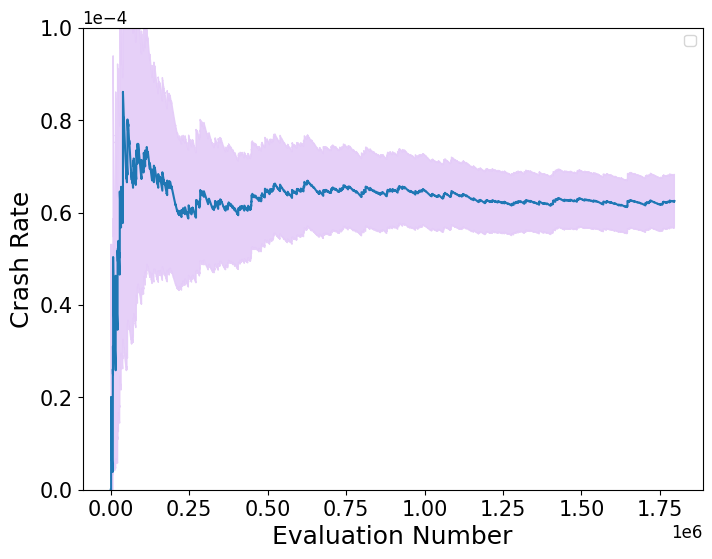

Final RHW: 0.09138260085525934


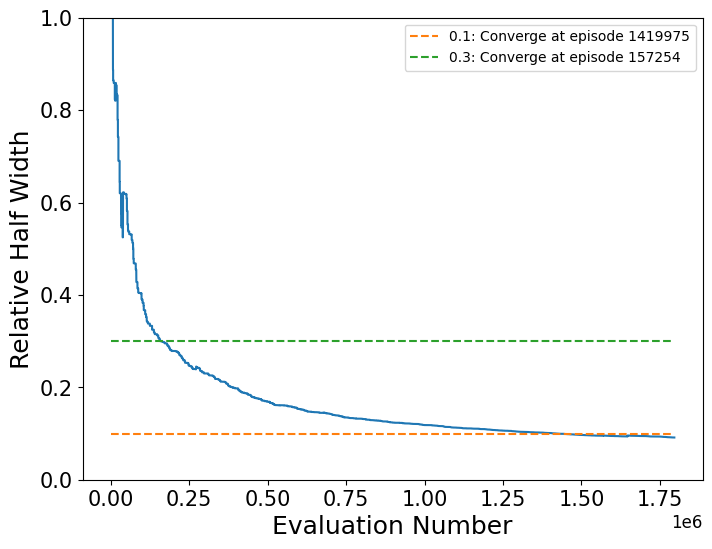

In [4]:
import matplotlib.pyplot as plt    
from scipy.stats import norm
import pandas as pd 

confidence_interval = 0.1
z = norm.ppf(1-confidence_interval/2)
original_result = pd.Series(weighted_result_list)
crash_mean_result = original_result.rolling(len(original_result), min_periods=1).mean()
unit_std_result = original_result.rolling(len(original_result), min_periods=1).std()
half_CI = z*unit_std_result/(np.sqrt(np.array(range(1, len(original_result)+1)))*crash_mean_result)
half_CI_numpy = half_CI.to_numpy()
crash_mean_result_numpy = crash_mean_result.to_numpy()
fig = plt.figure(figsize=(8,6), dpi=100)
plt.ylim(0,1e-4)

plt.plot(crash_mean_result_numpy)
plt.fill_between(range(len(crash_mean_result_numpy)), (1-half_CI_numpy)*crash_mean_result_numpy, (1+half_CI_numpy)*crash_mean_result_numpy, color=(229/256, 204/256, 249/256), alpha=0.9)
print("NDE crash rate:", crash_mean_result_numpy[-1])
print("RHW converge to 0.3 episode:", np.where(half_CI_numpy > 0.3)[0][-1])
print("[",crash_mean_result_numpy[-1],",",crash_mean_result_numpy[-1]*(1-half_CI_numpy[-1]),",",crash_mean_result_numpy[-1]*(1+half_CI_numpy[-1]),"]")
plt.xlabel("Evaluation Number",fontsize=18)
plt.ylabel("Crash Rate",fontsize=18)
ax = fig.gca()
ax.ticklabel_format(style='sci', scilimits=(-10,-8), axis='y')
ax.ticklabel_format(style='sci', scilimits=(-10,-8), axis='x')
tx = ax.xaxis.get_offset_text()
tx.set_fontsize(12)
tx = ax.yaxis.get_offset_text()
tx.set_fontsize(12)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.show()
fig = plt.figure(figsize=(8,6), dpi=100)
plt.plot(half_CI_numpy)
plt.ylim(0, 1)
plt.plot([0,len(half_CI_numpy)],[0.1]*2, "--",label=f"0.1: Converge at episode {np.where(half_CI_numpy > 0.1)[0][-1]}")
plt.plot([0,len(half_CI_numpy)],[0.3]*2, "--",label=f"0.3: Converge at episode {np.where(half_CI_numpy > 0.3)[0][-1]}")
print("Final RHW:", half_CI_numpy[-1])
ax = fig.gca()
ax.ticklabel_format(style='sci', scilimits=(-10,-8), axis='x')
plt.xlabel("Evaluation Number", fontsize=18)
plt.ylabel("Relative Half Width", fontsize=18)
plt.legend()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
tx = ax.xaxis.get_offset_text()
tx.set_fontsize(12)
tx = ax.yaxis.get_offset_text()
tx.set_fontsize(12)
plt.show()